In [3]:
#notes, links, etc.

#FRED data: 
#dataset: https://fred.stlouisfed.org/series/CCUSMA02CZM618N#
#link structure API: https://api.stlouisfed.org/fred/series?series_id=GNPCA&api_key=abcdefghijklmnopqrstuvwxyz123456&file_type=json

#COVID-Data
covid_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

#list of ISO-country codes: https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Officially_assigned_code_elements

#GDP Data
gdp_url = 'https://tradingeconomics.com/czech-republic/gdp-constant-prices'

#QUANDL NASDAQ index data 
quandl_url='https://www.quandl.com/api/v3/datasets/{database}/{dataset}/data.json?api_key={QUANDL_key}'

In [2]:
#import packages
import requests
import pandas as pd
import matplotlib.pyplot as plt
from keys import FRED_key
from keys import QUANDL_key

In [20]:
#functions for requesting QUANDL + FRED data from API and returning them in DataFrame format

def get_dataframe_quandl(database, dataset, api_key):
    url=f'https://www.quandl.com/api/v3/datasets/{database}/{dataset}/data.json?start_date=startdate=2020-01-31&end_date=2021-07-31&api_key={api_key}'

    d= requests.get(url).json()
    
    return pd.DataFrame(d['dataset_data']['data'], columns=d['dataset_data']['column_names']).set_index('Trade Date')
    
def get_dataframe_fred(series_id, api_key):
    url=f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json'

    d= pd.DataFrame(requests.get(url).json()['observations']).drop(['realtime_start', 'realtime_end'], axis=1).set_index('date')
    
    
    return d

In [29]:
#COVID data request
covid_df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv').set_index('date')

In [47]:
#QUANDL data request
quandl_datasets=['NQCZ','NQPL','NQHU']

nasdaq_df=pd.concat([get_dataframe_quandl('NASDAQOMX', ds, QUANDL_key) for ds in quandl_datasets], axis=1)

In [26]:
#FRED data request
index = ['CZ', 'PL', 'HU']
fred_datasets = pd.Series(data = ['CCUSMA02CZM618N', 'CCUSMA02PLM618N', 'CCUSMA02HUM618N'], index = index)

for i in range(len(fred_datasets)):
    if i == 0:
        exchange_df = get_dataframe_fred(fred_datasets[i], FRED_key)
    else:
        exchange_df[f'{fred_datasets.index[i]}'] = get_dataframe_fred(fred_datasets[i], FRED_key)
    
exchange_df.columns = index

In [48]:
nasdaq_index_df = nasdaq_df['Index Value']
nasdaq_index_df.columns = index
nasdaq_index_df

CZ      PL       HU
Trade Date                         
2021-07-28     NaN     NaN      NaN
2021-07-27  799.82  859.35  1607.78
2021-07-26  794.52  862.26  1588.86
2021-07-23  791.77  863.07  1609.93
2021-07-22  797.99  862.04  1633.68
...            ...     ...      ...
2020-02-06  725.67  790.92  1521.56
2020-02-05  721.66  798.54  1529.18
2020-02-04  714.82  789.20  1525.22
2020-02-03  711.52  774.20  1506.36
2020-01-31  705.91  773.37  1491.67

[389 rows x 3 columns]

In [49]:
exchange_df.to_parquet('data/FRED_Req.parquet')
covid_df.to_parquet('data/OWID_Req.parquet')
nasdaq_index_df.to_parquet('data/QUANDL_Req.parquet')

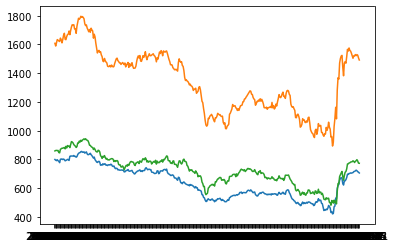

In [64]:
plt.plot(nasdaq_df_2)

In [73]:
nasdaq_df_2.index = pd.to_datetime(nasdaq_df_2.index)
nasdaq_df_2_monthly = nasdaq_df_2.resample('M').mean()

In [74]:
nasdaq_df_2_monthly

CZ           HU          PL
Trade Date                                     
2020-01-31  705.910000  1491.670000  773.370000
2020-02-29  695.455000  1516.803500  761.994000
2020-03-31  529.118636  1167.946818  566.431818
2020-04-30  492.017727  1001.269545  563.369545
2020-05-31  499.037619  1089.321905  581.842381
2020-06-30  564.230000  1230.310000  670.137727
2020-07-31  560.051739  1180.367826  685.254348
2020-08-31  572.644762  1224.512857  725.428095
2020-09-30  536.264091  1110.422273  676.692273
2020-10-31  519.081818  1089.543636  629.293636
2020-11-30  588.703333  1257.396667  683.750000
2020-12-31  654.390870  1422.790000  773.777391
2021-01-31  713.296190  1523.159048  792.046667
2021-02-28  723.685000  1516.738500  788.420500
2021-03-31  717.990000  1462.445217  764.372174
2021-04-30  750.983182  1469.090455  795.479545
2021-05-31  802.195714  1620.157143  870.083810
2021-06-30  836.473636  1743.604091  917.622273
2021-07-31  795.809474  1638.540526  873.485789

In [76]:
nasdaq_df_2.to_csv("data/nasdaq.csv")
nasdaq_df_2_monthly.to_csv("data/nasdaq_monthly.csv")